## Installing Libraries

In [ ]:
print('>>Installing Libraries')

!pip3 install pandas matplotlib numpy scikit-surprise

print('>>Libraries Installed')

>>Installing Libraries
>>Libraries Installed


## Importing Libraries

In [ ]:
print('>>Importing Libraries')

import pandas as pd

from surprise import Reader, Dataset, SVD

from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate

print('>>Libraries imported.')

>>Importing Libraries
>>Libraries imported.


## Importing Data

### Importing the Data

In [ ]:
df = pd.read_csv('/content/sample_data/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Dropping timestamp column

In [ ]:
df.drop('timestamp', axis=1, inplace = True) 
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


### Checking for Missing Data

In [ ]:
df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

## EDA(Exploratory data analysis)

### Number of movies/users

In [ ]:
n_movies = df["movieId"].nunique()
n_users = df["userId"].nunique()
print(f'Number of unique movies: {n_movies}')
print(f'Number of unique users: {n_users}')

Number of unique movies: 9724
Number of unique users: 610


### Sparsity of our data

Sparsity(%) = No.of missing values/ (total values)x100

In [ ]:
available_ratings = df['rating'].count()
total_ratings = n_movies*n_users
missing_ratings = total_ratings - available_ratings
sparsity = (missing_ratings/total_ratings)*100
print(f'Sparsity: {sparsity}')

Sparsity: 98.30003169443864


### Ratings Distribution

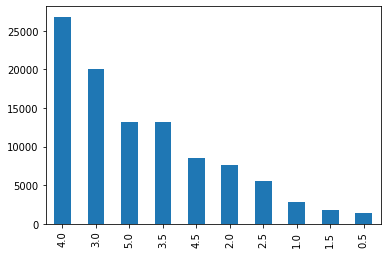

In [ ]:
df['rating'].value_counts().plot(kind = 'bar')

## Dimensionality Reduction

### filter movies with less than 3 ratings

In [ ]:
filter_movies = df['movieId'].value_counts() > 3
filter_movies = filter_movies[filter_movies].index.tolist()

### filter users with less than 3 movies rated

In [ ]:
filter_users = df['userId'].value_counts() > 3
filter_users = filter_users[filter_users].index.tolist()

### Remove rarely rated movies and rarely rating users

In [ ]:
print(f'Original Shape: {df.shape}')
df = df[(df['movieId'].isin(filter_movies)) & (df['userId'].isin(filter_users))]
print(f'New shape: {df.shape}')

Original Shape: (100836, 3)
New shape: (92394, 3)


## Create Training and Test Sets

### Columns used for training

In [ ]:
cols = ['userId', 'movieId', 'rating']

### Create surprise data set

In [ ]:
reader = Reader(rating_scale = (0.5, 5))
data = Dataset.load_from_df(df[cols], reader)

### Create Train-set and Prediction-set

In [ ]:
trainset = data.build_full_trainset()
antiset = trainset.build_anti_testset()

# Creating and training the model

### Creating the model

**SVD(Singular Value Decomposition)**

Interaction matrix = A X B X C

In [ ]:
algo = SVD(n_epochs = 25, verbose = True)

### Training the model

**Mean Absolute Error(MAE):** MAE measures the average magnitude of errors in a set of predictions, without considering their direction.

**Root Mean Squared Error(RMSE):** RMSE is the squareroot of average ofsquared differences between prediction and actual observation.

In [ ]:
cross_validate(algo, data, measures = ['RMSE','MAE'], cv =5, verbose = True)
print('>>Training Done')

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

## Predictions

### Predict ratings for all pairs (user, items) that are NOT in the training set

In [ ]:
predictions = algo.test(antiset)

In [ ]:
predictions[0]

Prediction(uid=1, iid=318, r_ui=3.529119856267723, est=5, details={'was_impossible': False})

### Predicting top 3 movies based on predictions

In [ ]:
from collections import defaultdict
def get_top_n(predictions, n):
  top_n = defaultdict(list)
  for uid, iid, _, est, _ in predictions:
    top_n[uid].append((iid, est))
  
  for uid, user_ratings in top_n.items():
    user_ratings.sort(key = lambda x: x[1], reverse = True)
    top_n[uid] = user_ratings[:n]
  return top_n
  pass
top_n = get_top_n(predictions, n = 3)
for uid, user_ratings in top_n.items():
  print(uid, [iid for (iid, rating) in user_ratings])

1 [318, 720, 898]
2 [1197, 4973, 260]
3 [1175, 5952, 58559]
4 [58559, 923, 356]
5 [4973, 541, 1228]
6 [471, 246, 1945]
7 [2959, 318, 778]
8 [3147, 60069, 38061]
9 [4973, 5690, 1291]
10 [260, 1225, 1357]
11 [1198, 720, 475]
12 [260, 527, 923]
13 [1249, 56782, 111]
14 [475, 6016, 541]
15 [112552, 4034, 912]
16 [89904, 1237, 910]
17 [1204, 951, 177593]
18 [750, 922, 1945]
19 [4226, 1172, 750]
20 [55820, 68157, 2571]
21 [306, 912, 3147]
22 [527, 110, 594]
23 [1201, 246, 720]
24 [1196, 951, 2959]
25 [110, 356, 1197]
26 [318, 68157, 912]
27 [293, 318, 296]
28 [928, 916, 951]
29 [5992, 2160, 1197]
30 [356, 1208, 475]
31 [2571, 4995, 2329]
32 [3147, 3275, 2318]
33 [5690, 1198, 1266]
34 [260, 4993, 741]
35 [527, 750, 1222]
36 [475, 1276, 608]
37 [1204, 260, 527]
38 [908, 858, 1221]
39 [1203, 541, 1222]
40 [5992, 1028, 1213]
41 [34405, 1095, 318]
42 [3949, 63082, 1262]
43 [223, 527, 593]
44 [741, 356, 8874]
45 [527, 318, 1199]
46 [260, 720, 858]
47 [6711, 930, 922]
48 [318, 1148, 293]
49 [858, 4